In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

In [2]:
# Importo las funciones necesarias para dibujar el cuarto del robot
import robot_room as robot
# Vamos a utilizar numpy a lo largo de la presentación
import numpy as np

# Localización

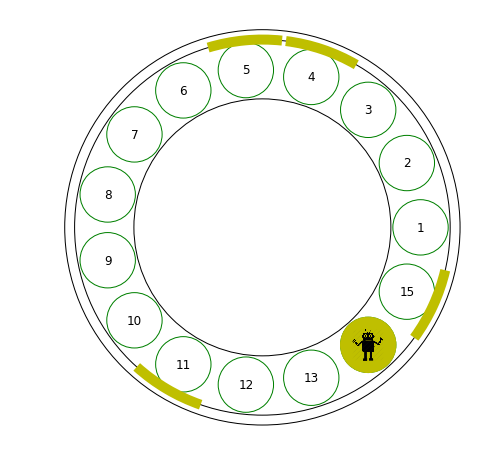

In [3]:
# Defino un arreglo con la posición de las puertas
doors = np.array([4, 5,11,15])
# Cantidad de posiciones posibles para el robot
N = 15
# Defino la posición inicial del robot en forma aleatoria.
initial_loc = np.random.randint(1, N+1)
# Grafico el cuarto del robot
robot.plot_robot_room(loc = initial_loc, N=N, doors = doors, figsize = (8,8))

# ¿Dónde esta el robot?

* El robot no observó su entorno aún
* Estado de máxima confusión

¿Cual es la probabilidad de que el robot se encuentre en la posición 1?

# Variable aleatoria (Definición y notación)
- Mapeo de los posibles resultados del experimento en el eje real.

Definimos $S$ como la variable aleatoria que describe el posición del robot.
- Si el robot esta en la posicion 1 diremos que la variable aleatoria $S$ es 1, es decir, $S = 1$
- En forma general si el robot esta en la posicion $k$ escribiremos $S=k$
- La probabilidad de que el robot este en la posición $k-$esima se escribe: $P(S=k)$

# Representación grafica de una V.A
- Caso disceto: Función de masa de probabilidad
- Caso continuo: Función de densidad de probabilidad

En el caso del robot la función de masa de probabilidad será:

In [4]:
# Defino un total de N unos
N_ones = np.ones(N)
print(N_ones)
# Lo divido por la cantidad de posibles posiciones
P = N_ones/N
print(P)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667
  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667
  0.06666667  0.06666667  0.06666667]


In [5]:
# Importo el paquete para graficar
from matplotlib import pyplot as plt

def plot_bar_chart(P, indexes=None, index_str='$P(S=%s)$' ,title='Función de masa de probabilidad de la posición del robot: $P(S=k)$'):
    N = len(P)
    if indexes is None:
        indexes = np.linspace(1, N, N, dtype = int) # Desde, Hasta, Cantidad, Tipo
    plt.figure(figsize=(20, 5)) # Tamaño del gráfico
    plt.bar(indexes, P, width=0.75, color='b') # Grafico
    plt.title(title)

    # Definición de indices
    string_indexes = [index_str%i for i in indexes]
    plt.xlim([0,N+1])
    plt.xticks(indexes, string_indexes) 
    plt.xticks(rotation=60)
    plt.show()

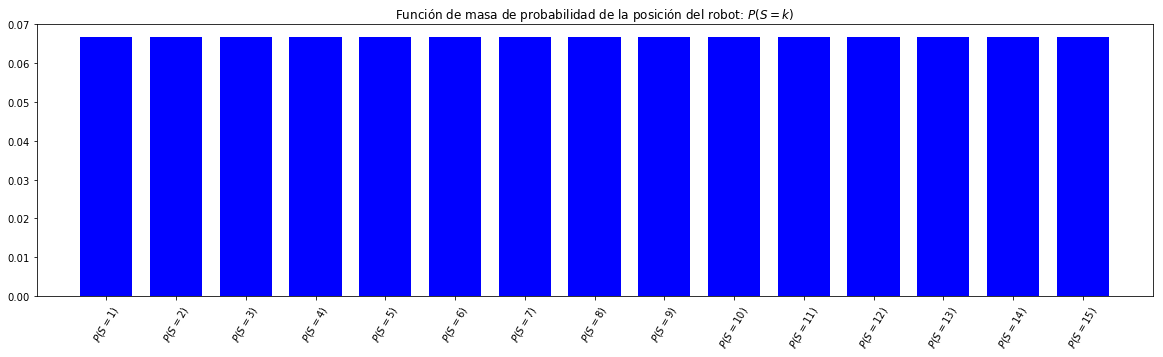

In [6]:
indexes = np.linspace(1, N, N, dtype = int) # Desde, Hasta, Cantidad, Tipo
plot_bar_chart(P, indexes)

Se dice que la V.A $S$ en este caso, tiene una distribución uniforme

Propiedades:

$\sum_{i=1}^N P(S=i) = 1$

In [9]:
# La suma de las probabilidades de cada posición es 1
P.sum()

0.99999999999999989

# Modelo Probabilístico
El modelo que describe la posición inicial del robot es simplemente la V.A $S$ con distribución uniforme.

## Modelo generativo

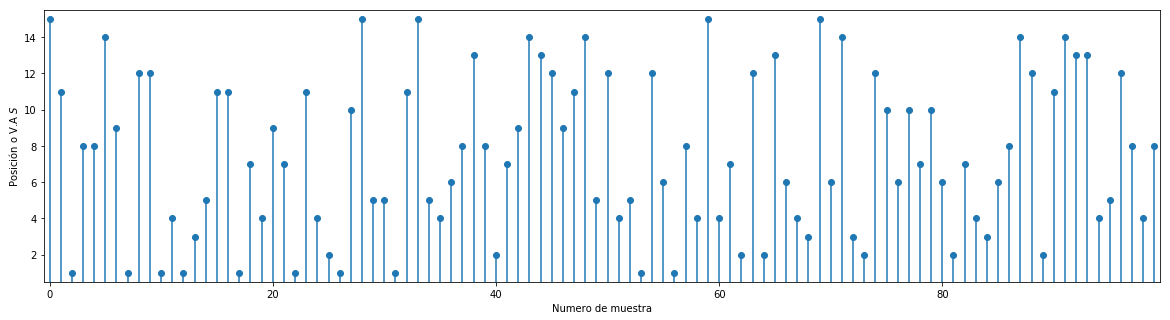

In [10]:
n_samples = 100
initial_locs = np.random.randint(1, N+1, n_samples)
plt.figure(figsize=(20, 5)) # Tamaño del gráfico
plt.stem(initial_locs.T) # ¿Por que lo traspongo?
plt.xlim([-0.5,n_samples-0.5])
plt.ylim([0.5,N+0.5])
plt.xlabel('Numero de muestra')
plt.ylabel('Posición o V.A $S$')
plt.show()

## Histograma

In [11]:
hist_results = np.histogram(initial_locs, bins = N, range=[1,N+1], density=True)
hist_results

(array([ 0.1 ,  0.07,  0.04,  0.11,  0.07,  0.07,  0.06,  0.08,  0.04,
         0.04,  0.07,  0.09,  0.05,  0.06,  0.05]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.]))

In [12]:
hist_results[0].sum()

1.0000000000000002

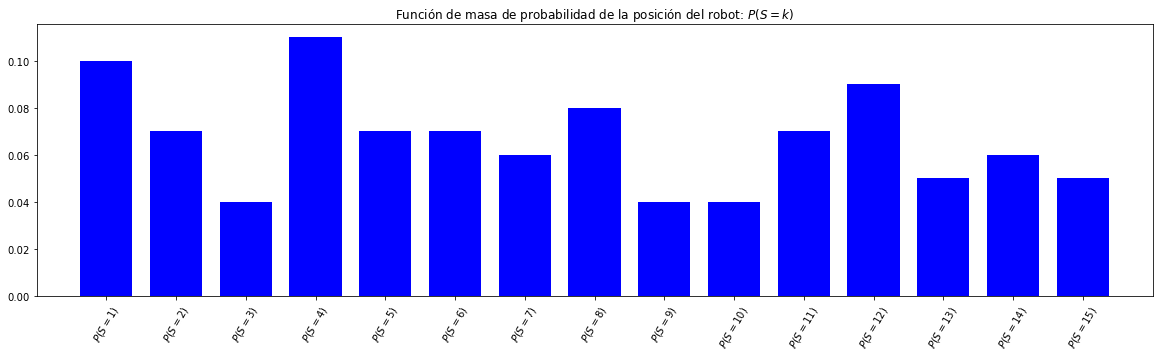

In [13]:
plot_bar_chart(hist_results[0])

¿Por que no se parece demasiado a la función de masa de probabilidad de $X$?

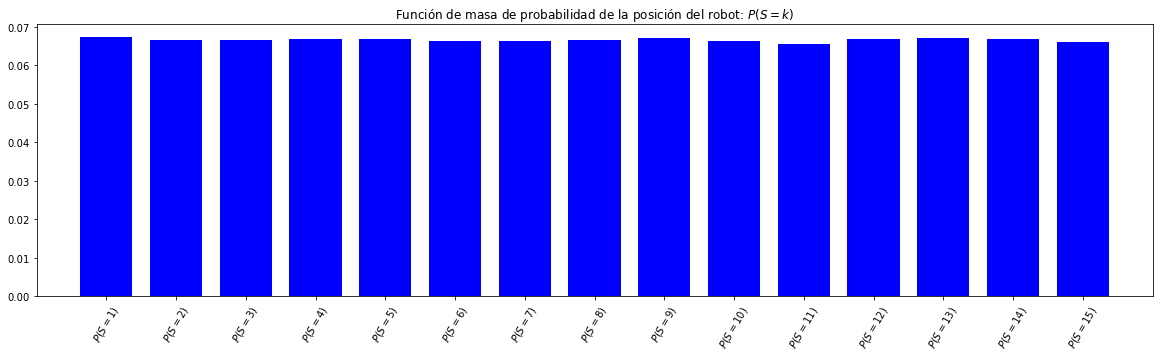

In [14]:
n_samples = 500000
initial_locs_big = np.random.randint(1, N + 1, n_samples)
hist_results_big = np.histogram(initial_locs_big, bins = N, range=[1,N+1], density=True)
plot_bar_chart(hist_results_big[0])

# Probabilidad condicional:
¿Donde esta el robot luego de la primera observación?

**Nota:** A priori el robot conoce la ubicación de las puertas

Dos posibilidades:
- Observa una puerta
- Observa la pared

## Observa una puerta

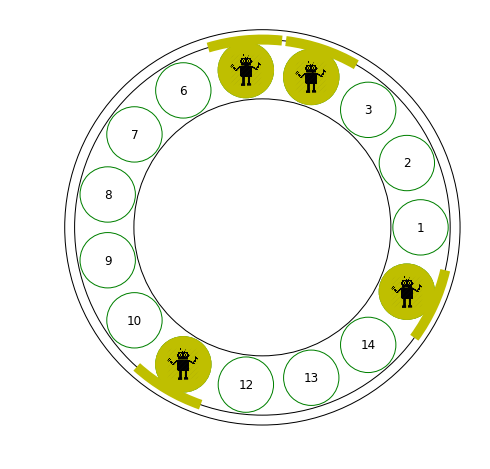

In [15]:
robot.plot_robot_room(loc = doors, N=N, doors = doors, figsize = (8,8))

¿Como se modifica la funcion de masa de probabilidad en este caso?

In [16]:
print('Posiciones puertas:', doors)
P_puerta = np.zeros(N)
print('zeros:',P_puerta)
P_puerta[doors-1] = 1/(len(doors))
print('Probabilidad condicional:',P_puerta)
P_puerta.sum()

Posiciones puertas: [ 4  5 11 15]
zeros: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Probabilidad condicional: [ 0.    0.    0.    0.25  0.25  0.    0.    0.    0.    0.    0.25  0.    0.
  0.    0.25]


1.0

## Notacion
Definimos $X$ como la observación que puede tomar dos posibles valores:
{'puerta','pared'}

Ejemplo:

$P(S=4 \quad|\quad X=puerta) = 1/3$

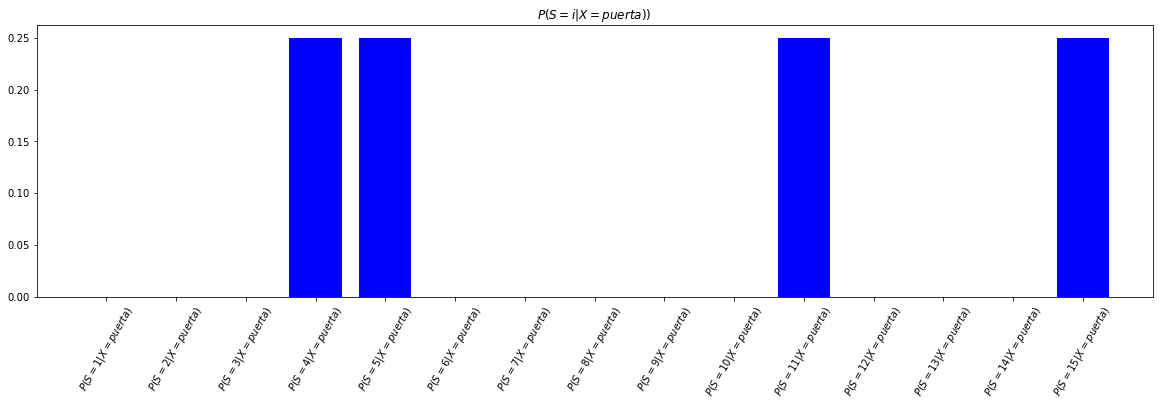

In [17]:
plot_bar_chart(P_puerta, title="$P(S=i|X=puerta))$",index_str='$P(S=%s|X=puerta)$')

## Observa la pared

Posiciones puertas: [ 4  5 11 15]
Probabilidad condicional: [ 0.09090909  0.09090909  0.09090909  0.          0.          0.09090909
  0.09090909  0.09090909  0.09090909  0.09090909  0.          0.09090909
  0.09090909  0.09090909  0.        ]


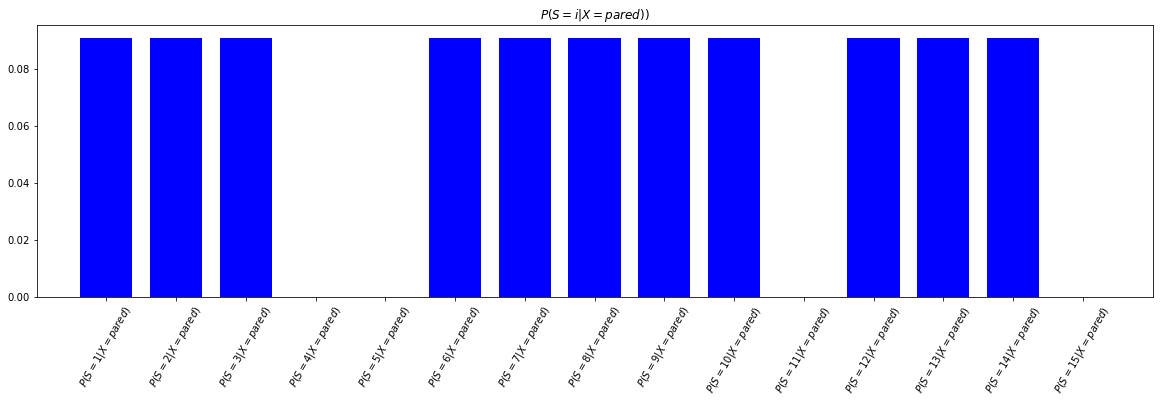

1.0

In [18]:
print('Posiciones puertas:', doors)
P_pared = np.ones(N)/(N-len(doors))
P_pared[doors-1] = 0
print('Probabilidad condicional:',P_pared)
plot_bar_chart(P_pared, title="$P(S=i|X=pared))$",index_str='$P(S=%s|X=pared)$')
P_pared.sum()

En forma general entonces:

$P(S=k|X)$

En este caso S es la posición y X es una puerta o la pared

Por ejemplo: $P(S=4|puerta) = 1/6$

## Likelihood
¿Podemos invertir la condición?

¿Cual es la $P(puerta|S=4)$?

En forma general:

$P(X|S=k)$

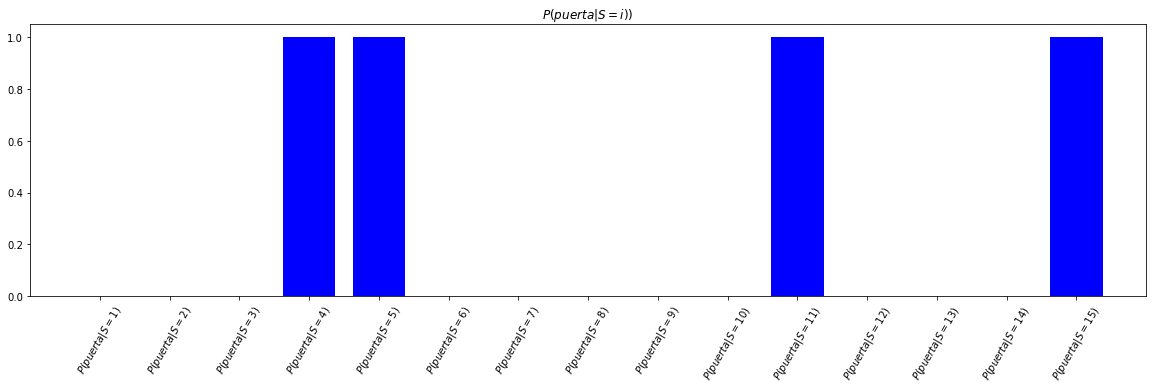

La suma en k es: 4.0


In [19]:
likelihood_puerta = np.zeros(N)
likelihood_puerta[doors-1] = 1
plot_bar_chart(likelihood_puerta, title="$P(puerta|S=i))$",index_str='$P(puerta|S=%s)$')
print('La suma en k es:',likelihood_puerta.sum())

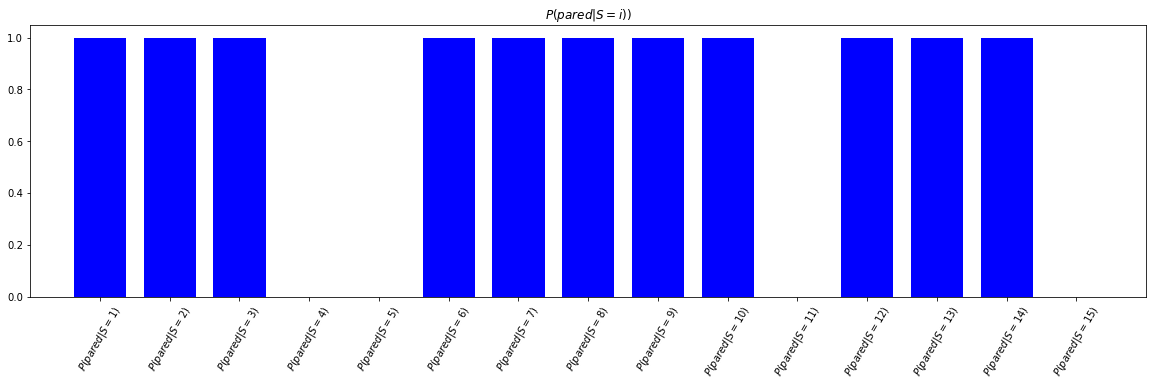

La suma en k es: 11.0


In [20]:
likelihood_pared = np.ones(N)
likelihood_pared[doors-1] = 0
plot_bar_chart(likelihood_pared, title="$P(pared|S=i))$",index_str='$P(pared|S=%s)$')
print('La suma en k es:',likelihood_pared.sum())

# El robot da un paso luego de observar una puerta
¿Como queda si función de masa de probabilidad?

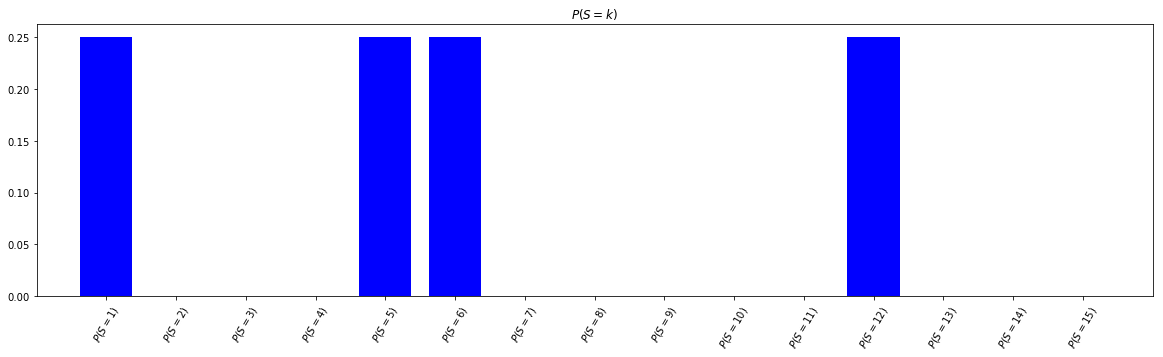

In [21]:
def take_step(P):
    P_updated = np.zeros(len(P))
    P_updated[1:] = P[:-1]
    P_updated[0] = P[-1]
    return P_updated
P_puerta_updated = take_step(P_puerta)
plot_bar_chart(P_puerta_updated, title="$P(S=k)$",index_str='$P(S=%s)$')

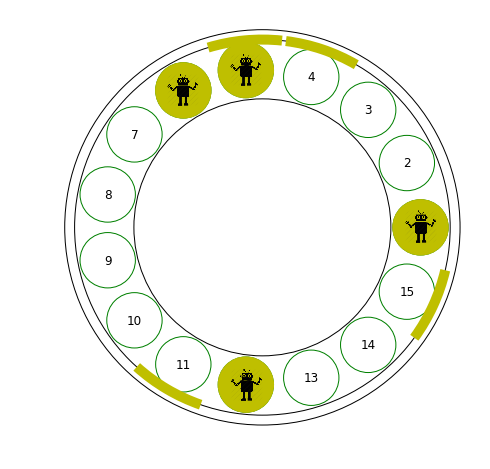

In [22]:
robot.plot_robot_room(loc = doors+1, N=N, doors = doors, figsize = (8,8))

Tenemos entonces:

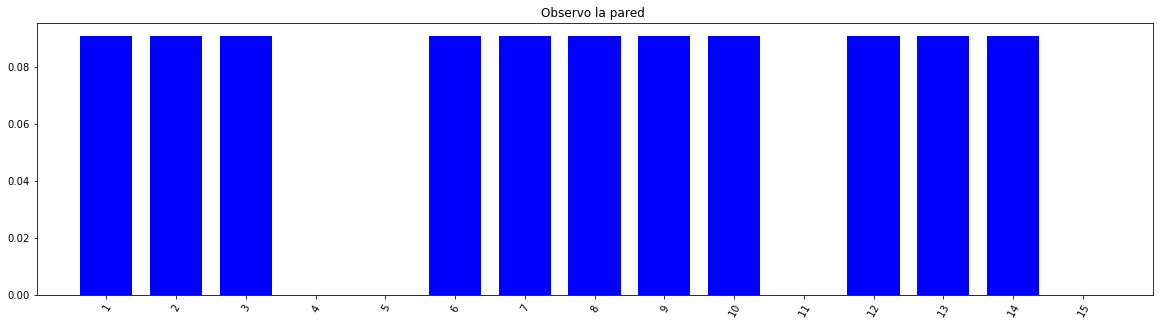

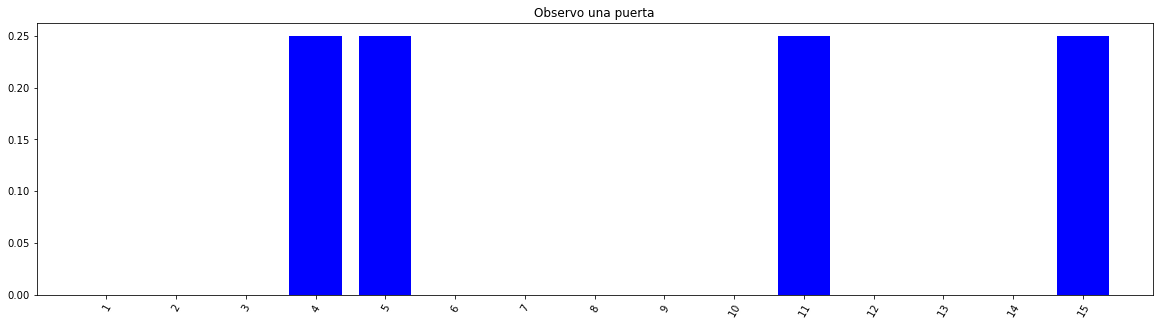

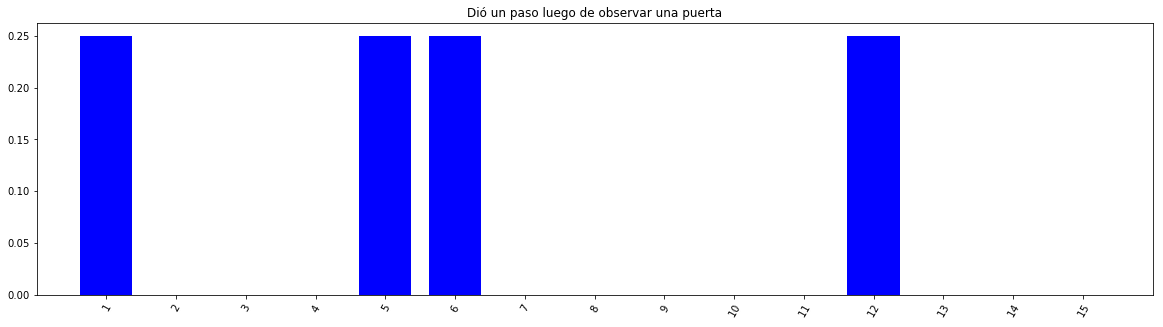

In [23]:
plot_bar_chart(P_pared, title="Observo la pared ",index_str='$%s$')
plot_bar_chart(P_puerta, title="Observo una puerta",index_str='$%s$')
plot_bar_chart(P_puerta_updated, title="Dió un paso luego de observar una puerta",index_str='$%s$')

Si ahora vuelve a observar una puerta. ¿Comó queda la función de masa de probabilidad?

¿Y si observa la pared?

¿Se puede resumir en una operación entre las funciones de masa de probabilidad?

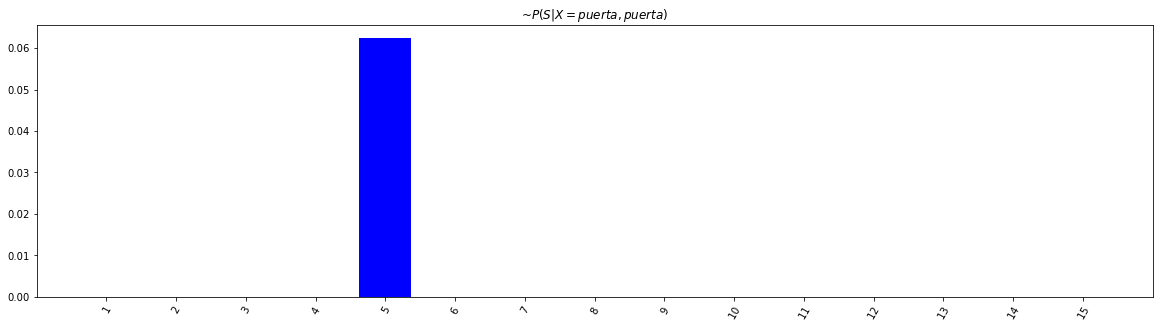

In [24]:
P_puerta_puerta_un = P_puerta*P_puerta_updated
plot_bar_chart(P_puerta_puerta_un, title="~$P(S|X={puerta,puerta})$", index_str='$%s$')

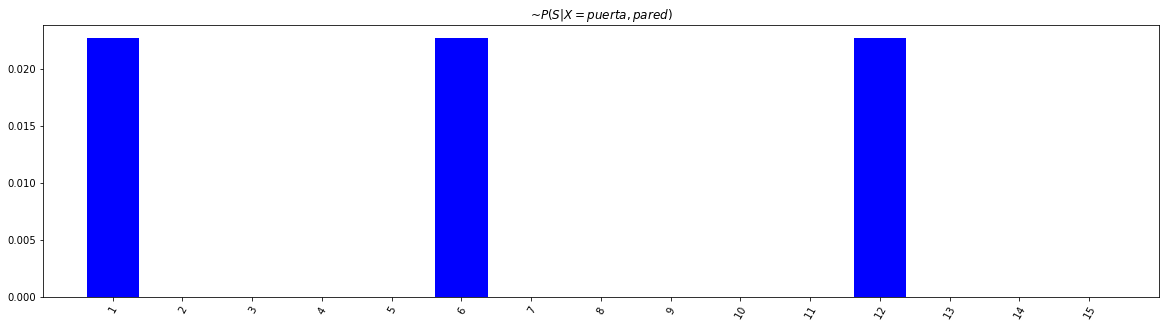

In [25]:
P_puerta_pared_un = P_pared*P_puerta_updated
plot_bar_chart(P_puerta_pared_un, title="~$P(S|X={puerta,pared})$", index_str='$%s$')

¿Qué problemas tienen las "funciones de masa de probabilidad" anteriores?

In [26]:
P_puerta_pared_un.sum()

0.068181818181818177

**Normailización**

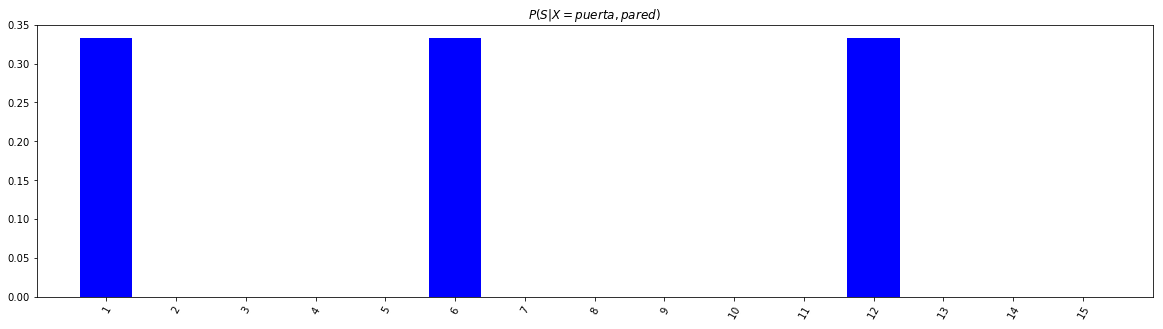

1.0

In [27]:
P_puerta_pared = P_puerta_pared_un/P_puerta_pared_un.sum()
plot_bar_chart(P_puerta_pared, title="$P(S|X={puerta,pared})$", index_str='$%s$')
P_puerta_pared.sum()

# Probabilidad conjunta, likelihood y probabilidad condicional

$P(X,S=k) = P(X|S=k)P(S=K) = P(S=k|X)P(X)$

$P(puerta,S=4) = P(puerta|S=4)P(S=4) = P(S=4|puerta)P(puerta)$

$P(puerta,S=4) = 1 \frac{1}{15} = \frac{1}{4} \frac{4}{15} = \frac{1}{15}$

$P(pared,S=4) = 0 \frac{1}{15} = 0 \frac{11}{15} = 0 $

$P(S=k|X) = \frac{P(X|S=k)P(S=K)}{P(X)}$

$P(S=4|puerta) = \frac{P(puerta|S=4)P(S=4)}{P(puerta)} = \frac{1 \frac{1}{15}}{\frac{4}{15}} = \frac{1}{4}$

# Teorema de Bayes

$ \large P(S=k|X) = \huge \frac{P(X|S=k)P(S=K)}{\sum_i{P(X|S_i)P(S_i)}}$

$\large Posteriori = \huge \frac{Likelihood \quad x \quad Priori}{Normalización}$

En nuestro ejemplo puerta, puerta:

P_puerta_puerta_un = P_puerta*P_puerta_updated
P_puerta_pared = P_puerta_puerta_un/P_puerta_puerta_un.sum()

Likelihood = P_puerta (En realidad no es exactamente el likelihood, pero es proporcional en este caso)
Priori = P_puerta_updated

# Definimos el likelihood en este ejemplo

In [28]:
likelihood = {}
likelihood['puerta'] = likelihood_puerta
likelihood['pared'] = likelihood_pared

# Función de Update

In [29]:
def update_hist(likelihood, prior):
    posterior_un = likelihood*prior
    posterior = posterior_un/posterior_un.sum()
    return posterior

def get_robot_samples(initial_pos, doors, N_positions, N_samples):
    initial_pos = initial_pos - 1
    output = []
    for i in range(N_samples):
        actual_pos = (i+initial_pos)%N_positions + 1
        if actual_pos in doors:
            output.append('puerta')
        else:
            output.append('pared')
    return output

robot_sample = get_robot_samples(10, doors, N, 7)
print(robot_sample)

['pared', 'puerta', 'pared', 'pared', 'pared', 'puerta', 'pared']


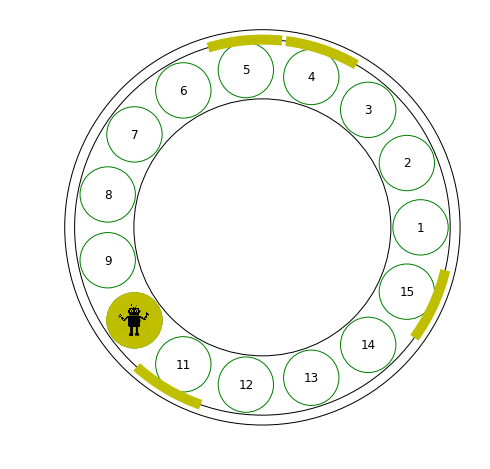

In [30]:
robot.plot_robot_room(loc = 10, N=N, doors = doors, figsize = (8,8))

In [36]:
from helpers.helper import plot_and_get_robot_position_histogram

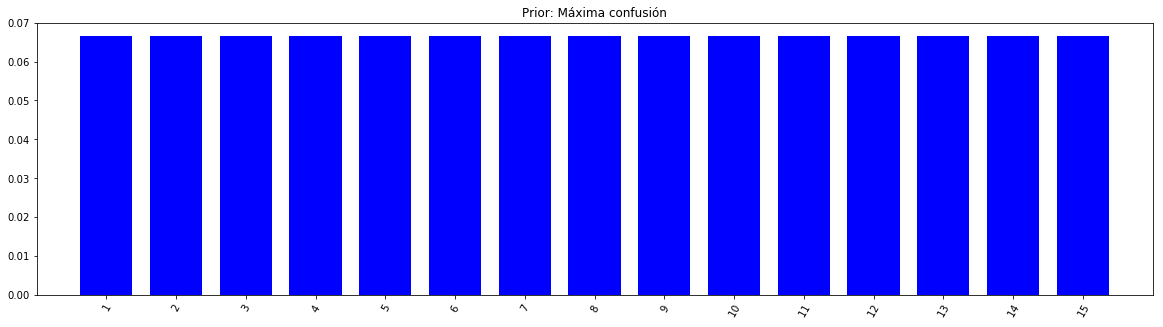

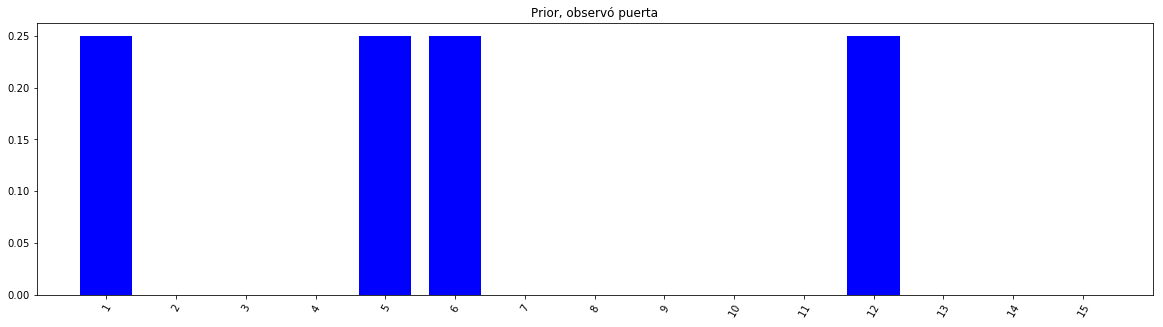

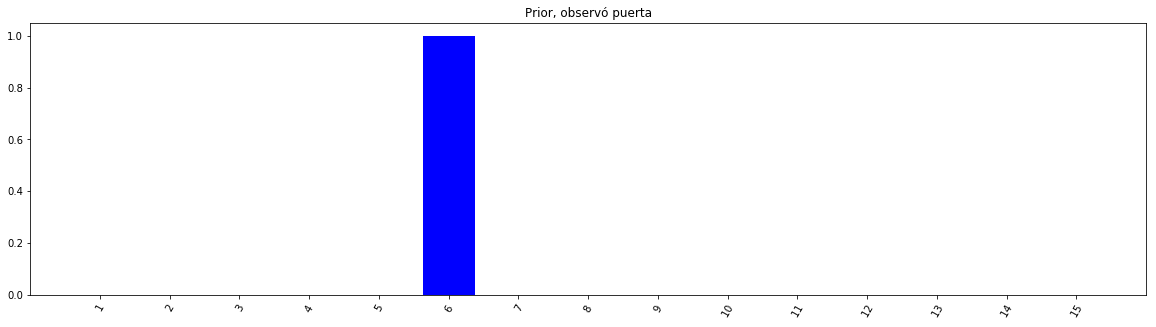

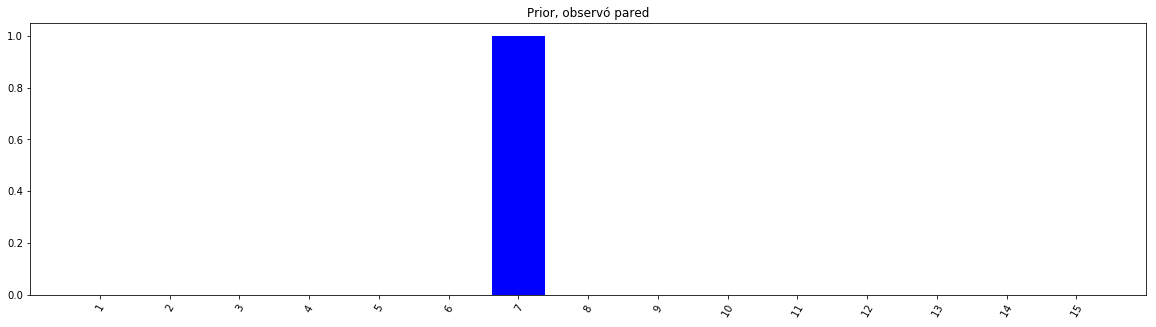

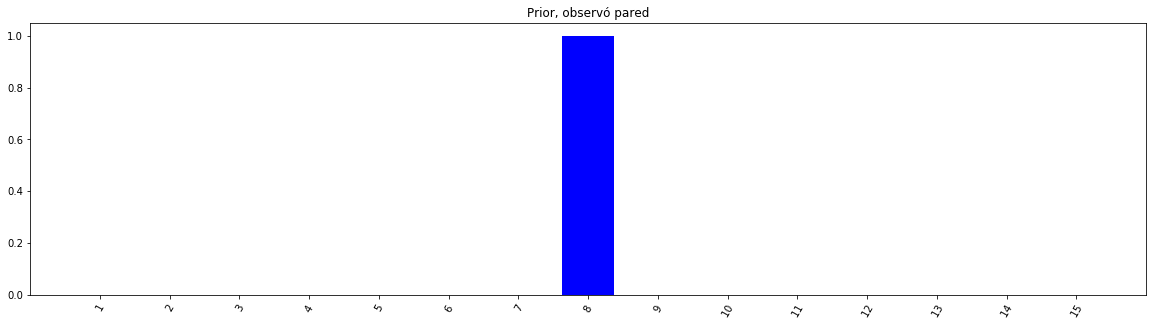

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [37]:
N_positions = 15
N_samples = 4
initial_position = 4
robot_samples = get_robot_samples(initial_position, doors, N_positions, N_samples)
plot_and_get_robot_position_histogram(robot_samples, likelihood)

¿Que pasa si el robot tiene un error al observar?